In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def match(h,a,simType):
        
    teams = [
    'Liverpool','Man City','Leicester','Chelsea','Man Utd','Wolves','Arsenal','Sheffield Utd','Burnley','Spurs','Everton',
    'Newcastle','Southampton','Crystal Palace','Brighton','West Ham','Watford','Aston Villa','Bournemouth','Norwich']
    GF = [
    72,81,63,60,56,45,49,34,37,51,40,35,42,28,35,40,29,36,32,29
    ] 
    GA = [
    25,34,31,44,33,36,41,33,46,44,47,45,55,40,44,58,52,62,59,61
    ]   
    
    avgGoals = pd.DataFrame({'teams':teams,'GF':GF,'GA':GA})
    avgGoals['AvgGF'] =  avgGoals['GF'] / 33
    avgGoals['AvgGA'] =  avgGoals['GA'] / 33    
    
    h_lam = float(avgGoals[avgGoals['teams']==h]['AvgGF']) * .5  + float(avgGoals[avgGoals['teams']==a]['AvgGA']) * .5
    a_lam = float(avgGoals[avgGoals['teams']==a]['AvgGF']) * .5  + float(avgGoals[avgGoals['teams']==h]['AvgGA']) * .5
    
    
    h_goals = np.random.poisson(h_lam)
    a_goals = np.random.poisson(a_lam)
    
    if simType == h and h_goals > a_goals:
        
        h_goals = a_goals + 1
        
    elif simType == a and h_goals < a_goals:
        
        a_goals = h_goals + 1
        
#Match Points allocation
    if h_goals == a_goals:
        h_pts = 1
        a_pts = 1
    elif h_goals > a_goals:
        h_pts = 3
        a_pts = 0
    else:
        h_pts = 0
        a_pts = 3
        
    h_gd = h_goals - a_goals
    a_gd = a_goals - h_goals
        
    match = pd.DataFrame({'Team':[h,a],
                         'Goals':[h_goals,a_goals],
                         'Goal Diff':[h_gd,a_gd],
                         'pts':[h_pts,a_pts]})
    
    return match

In [3]:
def matches(simType):

    MW = pd.DataFrame(columns=['Team', 'Goals', 'Goal Diff','pts'])

    df = match('Spurs','Everton',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Crystal Palace','Chelsea',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Watford','Norwich',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Arsenal','Leicester',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Man City','Newcastle',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Sheffield Utd','Wolves',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('West Ham','Burnley',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Brighton','Liverpool',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Bournemouth','Spurs',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Everton','Southampton',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Aston Villa','Man Utd',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Norwich','West Ham',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Watford','Newcastle',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Liverpool','Burnley',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Sheffield Utd','Chelsea',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Brighton','Man City',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Wolves','Everton',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Aston Villa','Crystal Palace',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Bournemouth','Leicester',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Man Utd','Southampton',simType)
    MW = MW.append(df,ignore_index=True)

    df = match('Chelsea','Norwich',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Burnley','Wolves',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Man City','Bournemouth',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Newcastle','Spurs',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Arsenal','Liverpool',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Everton','Aston Villa',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Leicester','Sheffield Utd',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Crystal Palace','Man Utd',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Southampton','Brighton',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Chelsea','Norwich',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('West Ham','Watford',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Norwich','Burnley',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Bournemouth','Southampton',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Spurs','Leicester',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Brighton','Newcastle',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Sheffield Utd','Everton',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Wolves','Crystal Palace',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Watford','Man City',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Aston Villa','Arsenal',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Man Utd','West Ham',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Liverpool','Chelsea',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Arsenal','Watford',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Burnley','Brighton',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Chelsea','Wolves',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Crystal Palace','Spurs',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Everton','Bournemouth',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Leicester','Man Utd',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Man City','Norwich',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Newcastle','Liverpool',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('Southampton','Sheffield Utd',simType)
    MW = MW.append(df,ignore_index=True)
    
    df = match('West Ham','Aston Villa',simType)
    MW = MW.append(df,ignore_index=True)
    
    return MW

In [4]:
def FinalTable(MW):
    FinalTable = pd.DataFrame({
        'Team':['Liverpool',
            'Man City',
            'Leicester',
            'Chelsea',
            'Man Utd',
            'Wolves',
            'Arsenal',
            'Sheffield Utd',
            'Burnley',
            'Spurs',
            'Everton',
            'Newcastle',
            'Crystal Palace',
            'Southampton',
            'Brighton',
            'West Ham',
            'Watford',
            'Aston Villa',
            'Bournemouth',
            'Norwich'],
        'Goal Differnce':[
            MW[MW['Team']=='Liverpool']['Goal Diff'].sum(),
            MW[MW['Team']=='Man City']['Goal Diff'].sum(),
            MW[MW['Team']=='Leicester']['Goal Diff'].sum(),
            MW[MW['Team']=='Chelsea']['Goal Diff'].sum(),
            MW[MW['Team']=='Man Utd']['Goal Diff'].sum(),
            MW[MW['Team']=='Wolves']['Goal Diff'].sum(),
            MW[MW['Team']=='Arsenal']['Goal Diff'].sum(),
            MW[MW['Team']=='Sheffield Utd']['Goal Diff'].sum(),
            MW[MW['Team']=='Burnley']['Goal Diff'].sum(),
            MW[MW['Team']=='Spurs']['Goal Diff'].sum(),
            MW[MW['Team']=='Everton']['Goal Diff'].sum(),
            MW[MW['Team']=='Newcastle']['Goal Diff'].sum(),
            MW[MW['Team']=='Crystal Palace']['Goal Diff'].sum(),
            MW[MW['Team']=='Southampton']['Goal Diff'].sum(),
            MW[MW['Team']=='Brighton']['Goal Diff'].sum(),
            MW[MW['Team']=='West Ham']['Goal Diff'].sum(),
            MW[MW['Team']=='Watford']['Goal Diff'].sum(),
            MW[MW['Team']=='Aston Villa']['Goal Diff'].sum(),
            MW[MW['Team']=='Bournemouth']['Goal Diff'].sum(),
            MW[MW['Team']=='Norwich']['Goal Diff'].sum()             
        ],
        'Points':[
            MW[MW['Team']=='Liverpool']['pts'].sum(),
            MW[MW['Team']=='Man City']['pts'].sum(),
            MW[MW['Team']=='Leicester']['pts'].sum(),
            MW[MW['Team']=='Chelsea']['pts'].sum(),
            MW[MW['Team']=='Man Utd']['pts'].sum(),
            MW[MW['Team']=='Wolves']['pts'].sum(),
            MW[MW['Team']=='Arsenal']['pts'].sum(),
            MW[MW['Team']=='Sheffield Utd']['pts'].sum(),
            MW[MW['Team']=='Burnley']['pts'].sum(),
            MW[MW['Team']=='Spurs']['pts'].sum(),
            MW[MW['Team']=='Everton']['pts'].sum(),
            MW[MW['Team']=='Newcastle']['pts'].sum(),
            MW[MW['Team']=='Crystal Palace']['pts'].sum(),
            MW[MW['Team']=='Southampton']['pts'].sum(),
            MW[MW['Team']=='Brighton']['pts'].sum(),
            MW[MW['Team']=='West Ham']['pts'].sum(),
            MW[MW['Team']=='Watford']['pts'].sum(),
            MW[MW['Team']=='Aston Villa']['pts'].sum(),
            MW[MW['Team']=='Bournemouth']['pts'].sum(),
            MW[MW['Team']=='Norwich']['pts'].sum()             
        ]

    })
    
    FinalTable = FinalTable.sort_values(by=['Points', 'Goal Differnce'], ascending=False)
    FinalTable['Pos'] = np.arange(len(FinalTable)) + 1
    FinalTable['CL'] = FinalTable['Pos'].apply(lambda x: 1 if x < 5 else 0) 
    FinalTable['CL_MC_Ban'] = FinalTable['Pos'].apply(lambda x: 1 if x < 6 else 0) 
    FinalTable['CL_MC_Ban']['Man City'] = 0
    return FinalTable

In [5]:
simType = 'Random' 

In [6]:
teams = [
    'Liverpool',
    'Man City',
    'Leicester',
    'Chelsea',
    'Man Utd',
    'Wolves',
    'Arsenal',
    'Sheffield Utd',
    'Burnley',
    'Spurs',
    'Everton',
    'Newcastle',
    'Crystal Palace',
    'Southampton',
    'Brighton',
    'West Ham',
    'Watford',
    'Aston Villa',
    'Bournemouth',
    'Norwich']
GoalDiff = [
    47,
    47,
    32,
    16,
    23,
    9,
    8,
    1,
    -9,
    7,
    -7,
    -10,
    -12,
    -14,
    -9,
    -18,
    -23,
    -26,
    -27,
    -36
] 
pts = [
    89,
    66,
    58,
    57,
    55,
    52,
    49,
    48,
    46,
    45,
    44,
    43,
    42,
    43,
    36,
    31,
    28,
    27,
    27,
    21   
]

table = pd.DataFrame({'Team':teams,'Goals':np.full(20,0),'Goal Diff':GoalDiff,'pts':pts})


In [7]:
LeagueSim = pd.DataFrame(columns=['Team', 'Goal Differnce', 'Points','CL'])
p = 1

for x in range(1,10001):
    MW = matches(simType)

    MW = MW.append(table,ignore_index=True)

    df = FinalTable(MW)

    LeagueSim = LeagueSim.append(df,ignore_index=True)
    
    pn = round(10001 / 10,0)
    
    if x == (p*pn):
        
        print(str(round(p/10,2)*100)+'% done')
              
        p = p + 1

C:\Users\andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


10.0% done
20.0% done
30.0% done
40.0% done
50.0% done
60.0% done
70.0% done
80.0% done
90.0% done
100.0% done


In [15]:
print(
'Leicester',str(round(LeagueSim[LeagueSim['Team']=='Leicester']['CL'].mean(),2)*100)+'%,',
 str(round(LeagueSim[LeagueSim['Team']=='Leicester']['CL_MC_Ban'].mean(),2)*100)+'% w/ city ban'
'\nChelsea',str(round(LeagueSim[LeagueSim['Team']=='Chelsea']['CL'].mean(),2)*100)+'%,',
 str(round(LeagueSim[LeagueSim['Team']=='Chelsea']['CL_MC_Ban'].mean(),2)*100)+'% w/ city ban'
'\nMan Utd',str(round(LeagueSim[LeagueSim['Team']=='Man Utd']['CL'].mean(),2)*100)+'%,',
 str(round(LeagueSim[LeagueSim['Team']=='Man Utd']['CL_MC_Ban'].mean(),2)*100)+'% w/ city ban'
'\nWolves',str(round(LeagueSim[LeagueSim['Team']=='Wolves']['CL'].mean(),2)*100)+'%,',
 str(round(LeagueSim[LeagueSim['Team']=='Wolves']['CL_MC_Ban'].mean(),2)*100)+'% w/ city ban'
'\nSheffield Utd',str(round(LeagueSim[LeagueSim['Team']=='Sheffield Utd']['CL'].mean(),2)*100)+'%,',
 str(round(LeagueSim[LeagueSim['Team']=='Sheffield Utd']['CL_MC_Ban'].mean(),2)*100)+'% w/ city ban'
'\nArsenal',str(round(LeagueSim[LeagueSim['Team']=='Arsenal']['CL'].mean(),2)*100)+'%,',
 str(round(LeagueSim[LeagueSim['Team']=='Arsenal']['CL_MC_Ban'].mean(),2)*100)+'% w/ city ban'
'\nSpurs',str(round(LeagueSim[LeagueSim['Team']=='Spurs']['CL'].mean(),2)*100)+'%,',
 str(round(LeagueSim[LeagueSim['Team']=='Spurs']['CL_MC_Ban'].mean(),2)*100)+'% w/ city ban'
)

Leicester 82.0%, 98.0% w/ city ban
Chelsea 77.0%, 95.0% w/ city ban
Man Utd 37.0%, 87.0% w/ city ban
Wolves 4.0%, 18.0% w/ city ban
Sheffield Utd 0.0%, 1.0% w/ city ban
Arsenal 0.0%, 0.0% w/ city ban
Spurs 0.0%, 0.0% w/ city ban


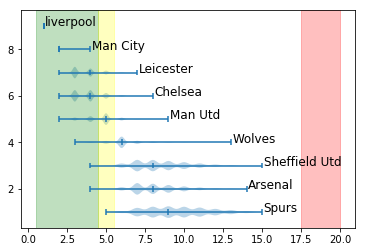

In [25]:
plt.violinplot(dataset = [LeagueSim[LeagueSim.Team == 'Spurs']["Pos"].values,
                           LeagueSim[LeagueSim.Team == 'Arsenal']["Pos"].values,
                         LeagueSim[LeagueSim.Team == 'Sheffield Utd']["Pos"].values,
                          LeagueSim[LeagueSim.Team == 'Wolves']["Pos"].values,
                          LeagueSim[LeagueSim.Team == 'Man Utd']["Pos"].values,
                          LeagueSim[LeagueSim.Team == 'Chelsea']["Pos"].values,
                          LeagueSim[LeagueSim.Team == 'Leicester']["Pos"].values,
                          LeagueSim[LeagueSim.Team == 'Man City']["Pos"].values,
                          LeagueSim[LeagueSim.Team == 'Liverpool']["Pos"].values] ,
                   showmeans=False,
                   showmedians=True,
                   vert=False)




plt.text(LeagueSim[LeagueSim.Team == 'Spurs']["Pos"].max()+.1, 1, r'Spurs', fontsize=12)
plt.text(LeagueSim[LeagueSim.Team == 'Arsenal']["Pos"].max()+.1, 2, r'Arsenal', fontsize=12)
plt.text(LeagueSim[LeagueSim.Team == 'Sheffield Utd']["Pos"].max()+.1, 3, r'Sheffield Utd', fontsize=12)
plt.text(LeagueSim[LeagueSim.Team == 'Wolves']["Pos"].max()+.1, 4, r'Wolves', fontsize=12)
plt.text(LeagueSim[LeagueSim.Team == 'Man Utd']["Pos"].max()+.1, 5, r'Man Utd', fontsize=12)
plt.text(LeagueSim[LeagueSim.Team == 'Chelsea']["Pos"].max()+.1, 6, r'Chelsea', fontsize=12)
plt.text(LeagueSim[LeagueSim.Team == 'Leicester']["Pos"].max()+.1, 7, r'Leicester', fontsize=12)
plt.text(LeagueSim[LeagueSim.Team == 'Man City']["Pos"].max()+.1, 8, r'Man City', fontsize=12)
plt.text(LeagueSim[LeagueSim.Team == 'Liverpool']["Pos"].max()+.1, 9, r'liverpool', fontsize=12)

plt.axvspan(.5, 4.5, color='green', alpha=0.25)
plt.axvspan(4.5, 5.5, color='yellow', alpha=0.25)
plt.axvspan(17.5, 20, color='red', alpha=0.25)

plt.show()

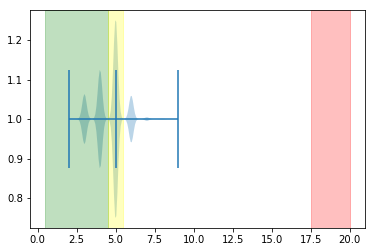

In [27]:
plt.violinplot(LeagueSim[LeagueSim.Team == 'Man Utd']["Pos"].values,
                    showmeans=False,
                   showmedians=True,
                   vert=False)


plt.axvspan(.5, 4.5, color='green', alpha=0.25)
plt.axvspan(4.5, 5.5, color='yellow', alpha=0.25)
plt.axvspan(17.5, 20, color='red', alpha=0.25)



plt.show()

In [30]:
len(LeagueSim)/20

10000.0

In [47]:
team = 'Arsenal'
print(str(team) + ' CL')
print('max pos:',LeagueSim[LeagueSim['Team']==team]['Pos'].min())
print('times making CL:',LeagueSim[LeagueSim['Team']==team]['CL'].sum(),',',
      str((LeagueSim[LeagueSim['Team']==team]['CL'].sum() / 10000)*100)  + '%')
print('CL with ban:',LeagueSim[LeagueSim['Team']==team]['CL_MC_Ban'].sum(),',',
     str((LeagueSim[LeagueSim['Team']==team]['CL_MC_Ban'].sum() / 10000)*100)  + '%')

Arsenal CL
max pos: 4.0
times making CL: 1 , 0.01%
CL with ban: 45.0 , 0.44999999999999996%
